**NAME:** Hazman Naim Bin Ahsan

**CLASS:** GA-DSBC-23-003

# 1. Prerequisite, Importing Libraries and Packages

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #split training and testing data

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error #model evaluation

# 2. Data Preparation

In [35]:
df = pd.read_csv('stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,31,0,0,2,4,1,70.66,27.2,4,0
1,2,13,0,0,2,1,1,85.81,18.6,2,0
2,1,18,0,0,2,2,2,60.56,33.0,4,0
3,2,65,0,0,1,2,2,205.77,46.0,3,1
4,1,4,0,0,2,1,1,90.42,16.2,2,0


# 3. Exploratory Data Analysis

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,1136.0,1.566901,0.497496,1.00,1.0000,2.00,2.00,3.00
age,1136.0,45.156690,23.054467,0.00,28.0000,48.00,63.00,82.00
hypertension,1136.0,0.118838,0.323740,0.00,0.0000,0.00,0.00,1.00
heart_disease,1136.0,0.067782,0.251482,0.00,0.0000,0.00,0.00,1.00
ever_married,1136.0,1.323944,0.468185,1.00,1.0000,1.00,2.00,2.00
work_type,1136.0,2.277289,0.847725,1.00,2.0000,2.00,3.00,5.00
Residence_type,1136.0,1.515845,0.499969,1.00,1.0000,2.00,2.00,2.00
avg_glucose_level,1136.0,107.693548,47.629268,55.27,77.6225,91.87,113.91,266.59
bmi,1084.0,29.198432,7.673146,11.30,24.1000,28.45,33.20,64.40
smoking_status,1136.0,2.768486,1.095490,1.00,2.0000,3.00,4.00,4.00


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1136 non-null   int64  
 1   age                1136 non-null   int64  
 2   hypertension       1136 non-null   int64  
 3   heart_disease      1136 non-null   int64  
 4   ever_married       1136 non-null   int64  
 5   work_type          1136 non-null   int64  
 6   Residence_type     1136 non-null   int64  
 7   avg_glucose_level  1136 non-null   float64
 8   bmi                1084 non-null   float64
 9   smoking_status     1136 non-null   int64  
 10  stroke             1136 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 97.8 KB


It seems that our dataset contains numerical feature.

## Data Cleaning

In [38]:
df.isnull().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  52
smoking_status        0
stroke                0
dtype: int64

Missing values in bmi dataset.


In [39]:
df['bmi'] = df['bmi'].fillna(np.mean(df['bmi']))

In [40]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Let's identify duplicates in our dataset.

In [41]:
df.duplicated().sum()

0

No duplicates in our dataset.

# 4. Model Development

In [42]:
X = df.drop('stroke', axis=1)
Y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 228
number of training samples: 908


## Logistic Regression

In [43]:
accuracies = {}

In [44]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

acc = LR.score(X_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 87.72%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
accuracies

{'Logistic Regression': 87.71929824561403}

## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

acc = DTC.score(X_test,y_test)*100

accuracies['Decision Tree Classifier'] = acc
print("Test Accuracy {:.2f}%".format(acc))
accuracies

Test Accuracy 78.95%


{'Logistic Regression': 87.71929824561403,
 'Decision Tree Classifier': 78.94736842105263}

## Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

acc = RF.score(X_test,y_test)*100

accuracies['Random Forest Classifier'] = acc
print("Test Accuracy {:.2f}%".format(acc))
accuracies

Test Accuracy 86.84%


{'Logistic Regression': 87.71929824561403,
 'Decision Tree Classifier': 78.94736842105263,
 'Random Forest Classifier': 86.8421052631579}

## K Nearest Neighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

acc = KNN.score(X_test,y_test)*100

accuracies['K-Nearest Neighbors'] = acc
print("Test Accuracy {:.2f}%".format(acc))
accuracies

Test Accuracy 85.53%


{'Logistic Regression': 87.71929824561403,
 'Decision Tree Classifier': 78.94736842105263,
 'Random Forest Classifier': 86.8421052631579,
 'K-Nearest Neighbors': 85.52631578947368}

<BarContainer object of 4 artists>


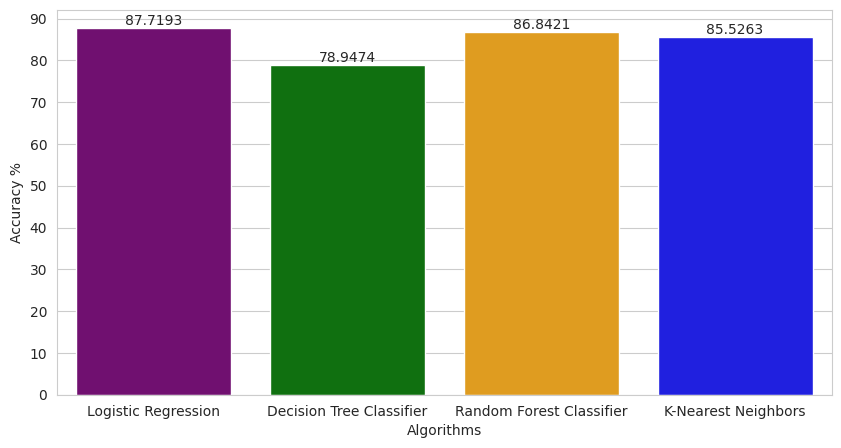

In [49]:
colors = ["purple", "green", "orange", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

for i in ax.containers: #function1
    print(i)
    ax.bar_label(i, ) #function2

plt.show()

In [52]:
# User defined function to make confusion matrix (can calcualate manually)
from sklearn.metrics import confusion_matrix
models = [LR, DTC, RF, KNN]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier']
confusion_matrices = {}

for model, model_name in zip(models, model_names):
    prediction = model.predict(X_test)
    cm = confusion_matrix(y_test, prediction)

    confusion_matrices[f'cm_{model_name.lower()}'] = cm

    if model_name == 'LogisticRegression':
        cm_lr = cm
    elif model_name == 'DecisionTreeClassifier':
        cm_dtc = cm
    elif model_name == 'RandomForestClassifier':
        cm_rf = cm
    elif model_name == 'KNeighborsClassifier':
        cm_knn = cm

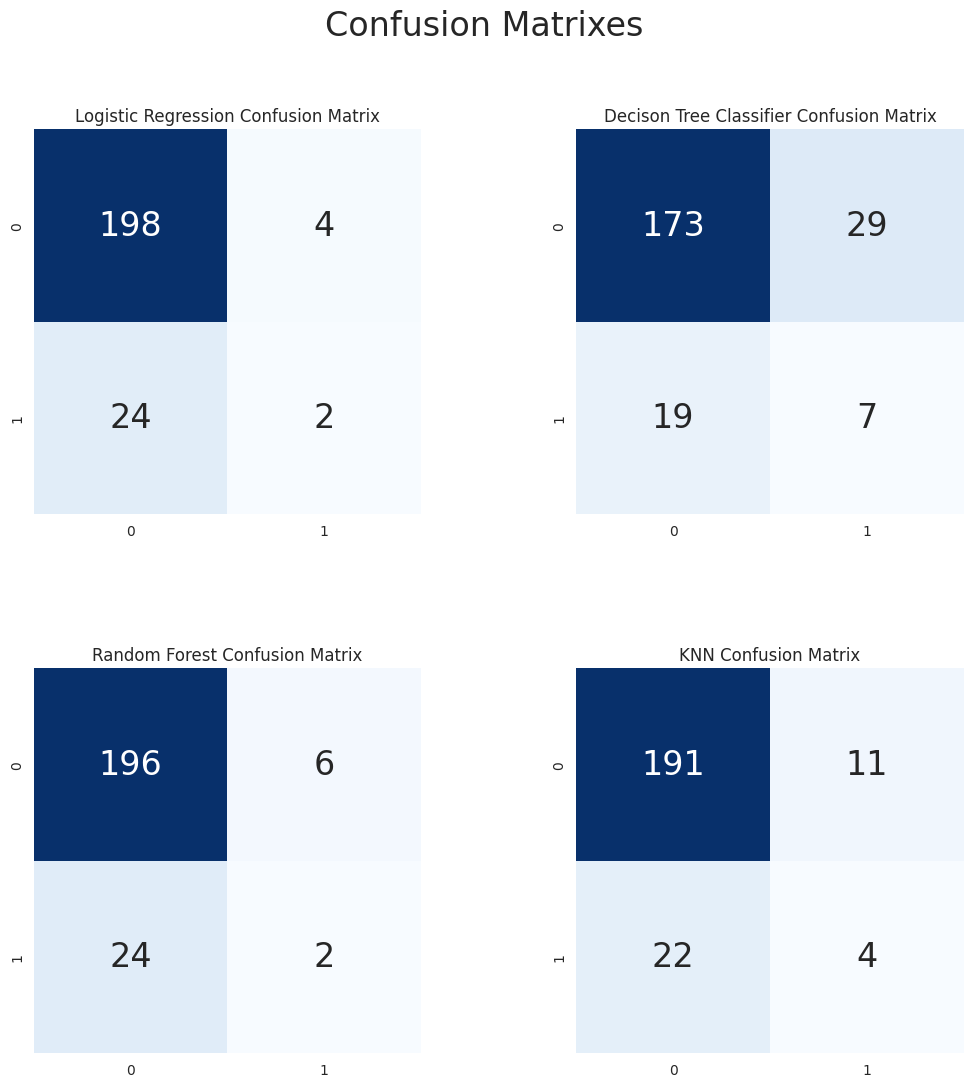

In [53]:
plt.figure(figsize=(12,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

# Plot Logistic Regression Confusion Matrix
plt.subplot(2, 2, 1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

# Plot GBC Confusion Matrix
plt.subplot(2, 2, 2)
plt.title("Decison Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

# Plot RF Confusion Matrix
plt.subplot(2, 2, 3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

# Plot RF2 Confusion Matrix
plt.subplot(2, 2, 4)
plt.title("KNN Confusion Matrix")
sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.show()

## Features Importance

In [54]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

**Permutation Importance**

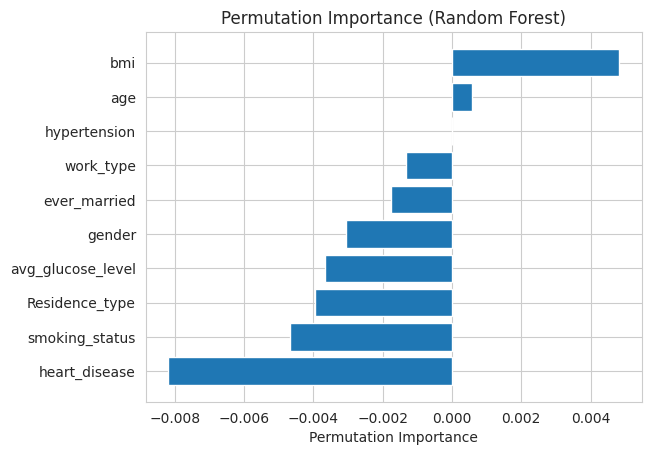

In [55]:
perm_importance = permutation_importance(RF, X_test, y_test, n_repeats=30, random_state=0)

# Get feature names
feature_names = X_test.columns

# Calculate mean importance and sort features
mean_importance = perm_importance.importances_mean
sorted_idx = mean_importance.argsort()

# Plot permutation importance
plt.barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (Random Forest)')
plt.show()

**Random Forest Feature Importance**

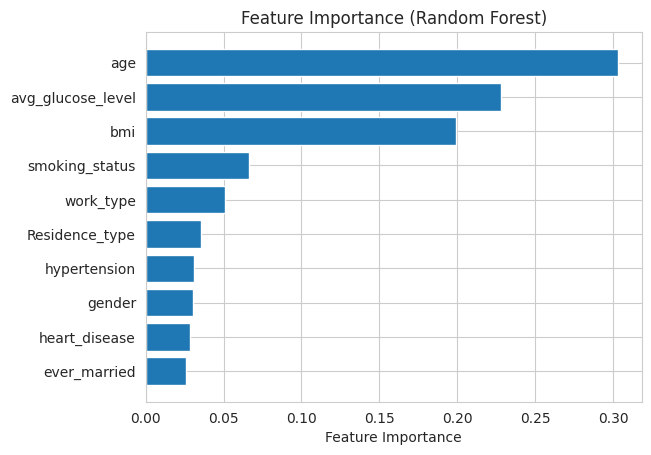

In [56]:
# Get feature importances from RandomForest
rf_feature_importances = RF.feature_importances_

# Sort features by importance
sorted_idx_rf = rf_feature_importances.argsort()

# Plot feature importances from RandomForest
plt.barh(range(len(sorted_idx_rf)), rf_feature_importances[sorted_idx_rf], align='center')
plt.yticks(range(len(sorted_idx_rf)), [feature_names[i] for i in sorted_idx_rf])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()


In [63]:
X = df.drop(['ever_married',
             'heart_disease',
             'Residence_type',
             'hypertension',
             'gender',
             'work_type',
             'smoking_status',
             'stroke'], axis=1)


Y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 228
number of training samples: 908


In [72]:
LR2 = LogisticRegression()
LR2.fit(X_train, y_train)

acc = LR2.score(X_test,y_test)*100

accuracies['Logistic Regression (Selected Features)'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 88.16%


In [73]:
X_test.columns

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

In [74]:
prediction = LR2.predict(X_test)
cm_lr2 = confusion_matrix(y_test, prediction)
cm_lr2

array([[200,   2],
       [ 25,   1]])

# 6. Model Evaluation

<BarContainer object of 5 artists>


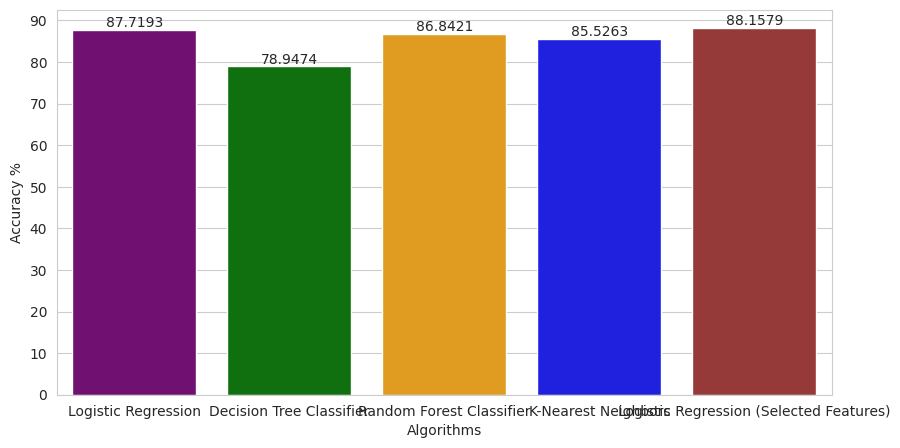

In [75]:
colors = ["purple", "green", "orange", "blue", "brown"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

for i in ax.containers: #function1
    print(i)
    ax.bar_label(i, ) #function2

plt.show()

In [ ]:
#conda install -c anaconda graphviz

In [ ]:
#import os

#os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [76]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz #Decision tree

import pydotplus

In [77]:
important_features = ['age', 'avg_glucose_level', 'bmi', 'work_type']

f = df[important_features] #input
t = df['stroke'] #target

In [78]:
df['stroke'].value_counts()

0    1000
1     136
Name: stroke, dtype: int64

In [80]:
#X_train, X_test, y_train, y_test = train_test_split(f, t, test_size=0.2, random_state=0)

In [81]:
# Create and fit the decision tree
clf_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_dt.fit(f, t)

# Export resulting tree to DOT source code string
dot_data = export_graphviz(clf_dt,
                                feature_names=important_features,
                                out_file=None,
                                filled=True,
                                rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('tree.png')

True


### Thank you for taking the time to review my notebook!

Your attention and feedback are greatly appreciated!

**Linkedin:** [Link](https://www.linkedin.com/in/hazmannaim/)

**Github:** [Link](https://github.com/HazmanNaim)

**Kaggle:** [Link](https://www.kaggle.com/hazmannaim)